Importing Libraries 

In [1]:
import os
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import tensorflow as tf

Converting data into numpy arrays

In [2]:
x_train=np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train=np.array([250, 300, 480, 430, 630, 730])

Visualising Data

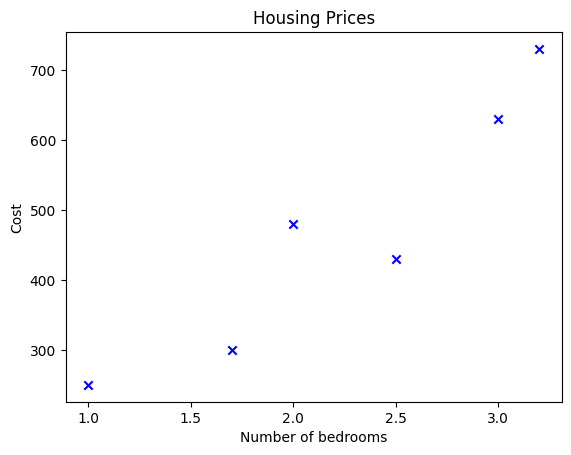

In [3]:
plt.scatter(x_train,y_train,marker='x',c='b')
plt.title("Housing Prices")
plt.xlabel("Number of bedrooms")
plt.ylabel("Cost")
plt.show()

In [4]:
def compute_model_output(x,w,b):
    m=len(x)
    f_wb=np.zeroes(m)    
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb

In [5]:
def compute_cost(x,y,w,b):
    m=len(x)
    cost_sum=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=(f_wb-y[i])**2
        cost_sum+=cost
    total_sum=(1/(2*m))*cost_sum
    return total_sum

In [6]:
def compute_gradients(x,y,w,b):
    m=len(x)
    df_dw=0
    df_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        df_dw_i=(f_wb-y[i])*x[i]
        df_db_i=(f_wb-y[i])
        df_dw=df_dw+df_dw_i
        df_db=df_db+df_db_i
    df_dw+=df_dw/m
    df_db+=df_db/m
    return df_dw,df_db

In [7]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_funtion,gradient_function):
    w=w_in
    b=b_in
    J_history=[]
    p_history=[]
 
    for i in range(num_iters):
        df_dw,df_db=gradient_function(x,y,w,b)
        w-=(alpha*df_dw)
        b-=(alpha*df_db)

        if i<100000:
            J_history.append(cost_funtion(x,y,w,b))
            p_history.append([w,b])

        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration{i:4}: Cost {J_history[-1]:0.2e} df_dw: {df_dw: 0.3e}, df_db: {df_db: 0.3e} w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,J_history,p_history
            
            

In [8]:
w_in=0
b_in=0
num_iters=10000
alpha=0.01

w_final,b_final,J_history,p_hisotry=gradient_descent(x_train,y_train,w_in,b_in,alpha,num_iters,compute_cost,compute_gradients)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration   0: Cost 3.87e+04 df_dw: -8.191e+03, df_db: -3.290e+03 w:  8.191e+01, b: 3.29000e+01
Iteration1000: Cost 1.74e+03 df_dw: -3.514e-02, df_db:  8.614e-02 w:  2.093e+02, b: 2.56034e+00
Iteration2000: Cost 1.74e+03 df_dw: -6.837e-05, df_db:  1.676e-04 w:  2.094e+02, b: 2.42305e+00
Iteration3000: Cost 1.74e+03 df_dw: -1.330e-07, df_db:  3.260e-07 w:  2.094e+02, b: 2.42278e+00
Iteration4000: Cost 1.74e+03 df_dw: -2.581e-10, df_db:  6.346e-10 w:  2.094e+02, b: 2.42278e+00
Iteration5000: Cost 1.74e+03 df_dw: -1.360e-12, df_db:  9.616e-13 w:  2.094e+02, b: 2.42278e+00
Iteration6000: Cost 1.74e+03 df_dw: -1.293e-12, df_db:  0.000e+00 w:  2.094e+02, b: 2.42278e+00
Iteration7000: Cost 1.74e+03 df_dw: -1.293e-12, df_db:  0.000e+00 w:  2.094e+02, b: 2.42278e+00
Iteration8000: Cost 1.74e+03 df_dw: -1.293e-12, df_db:  0.000e+00 w:  2.094e+02, b: 2.42278e+00
Iteration9000: Cost 1.74e+03 df_dw: -1.293e-12, df_db:  0.000e+00 w:  2.094e+02, b: 2.42278e+00
(w,b) found by gradient descent: (209.36

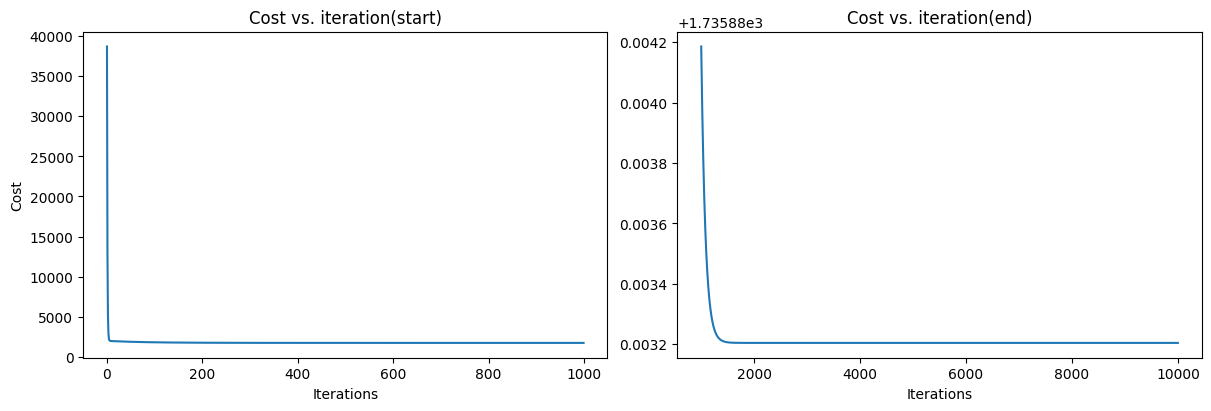

In [9]:
fig, (ax1,ax2)= plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:1000])
ax2.plot(1000+np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title('Cost vs. iteration(start)')
ax2.set_title('Cost vs. iteration(end)')
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax1.set_ylabel('Cost')
plt.show()